# Rock Paper Scissor
- **Nama:** I Putu Eka Putra Juniawan
- **Email:** ekaputrajuniawan@gmail.com
- **ID Dicoding:** ptekaputra

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

In [20]:
# Menentukan class names
class_names = ['rock', 'paper', 'scissors']

In [5]:
# Definisikan direktori dataset
dataset_dir = "./dataset/"

In [6]:
# Data augmentation dengan rotasi lebih besar dan zoom lebih besar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,  # Rotation lebih besar
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.4,  # Zoom range lebih besar
    horizontal_flip=True,
    validation_split=0.4  # 40% untuk validation
)

In [7]:
# Memuat train dan validation set
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(200, 300),
    batch_size=32,
    class_mode='sparse',
    subset='training',
    seed=123
)

Found 1314 images belonging to 3 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(200, 300),
    batch_size=32,
    class_mode='sparse',
    subset='validation',
    seed=123
)

Found 874 images belonging to 3 classes.


In [9]:
# Menggunakan VGG16 pre-trained model (transfer learning)
base_model = VGG16(input_shape=(200, 300, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Membekukan layer VGG16

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 34s 1us/step
AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'


In [10]:
# Model Sequential dengan tambahan Global Average Pooling dan Dense Layer
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Menggantikan flatten dengan average pooling
    layers.Dense(256, activation='relu'),  # Dense layer tambahan
    layers.BatchNormalization(),  # Batch normalization
    layers.Dropout(0.5),  # Dropout untuk mencegah overfitting
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 kelas: rock, paper, scissors
])

In [11]:
# Compile model dengan learning rate yang lebih rendah
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),  # Learning rate lebih rendah
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 9, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,880,835 (56.77 MB)

 Trainable params: 165,379 (646.01 KB)

 Non-trainable params: 14,715,456 (56.14 MB)

In [13]:
# Melatih model dengan jumlah epoch yang lebih tinggi (misalnya 20)
epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3574 - loss: 1.8767

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 215s 5s/step - accuracy: 0.3584 - loss: 1.8722 - val_accuracy: 0.5057 - val_loss: 1.0483
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 204s 5s/step - accuracy: 0.5055 - loss: 1.2644 - val_accuracy: 0.6373 - val_loss: 0.9923
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 215s 5s/step - accuracy: 0.6187 - loss: 1.0225 - val_accuracy: 0.4760 - val_loss: 0.9462
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 239s 6s/step - accuracy: 0.6539 - loss: 0.9194 - val_accuracy: 0.5263 - val_loss: 0.8783
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 231s 6s/step - accuracy: 0.7272 - loss: 0.7477 - val_accuracy: 0.6682 - val_loss: 0.7965
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 207s 5s/step - accuracy: 0.7400 - loss: 0.7462 - val_accuracy: 0.7906 - val_loss: 0.6909
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 194s 5s/step - accuracy: 0.7986 - loss: 0.5401 - val_accuracy: 0.8307 - val_loss: 0.6120
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 194s 5s/step - accuracy: 0.7859 - loss: 0.6280 - val_accuracy: 0.8638 - val_loss: 0.

In [14]:
# Plot hasil training dan validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

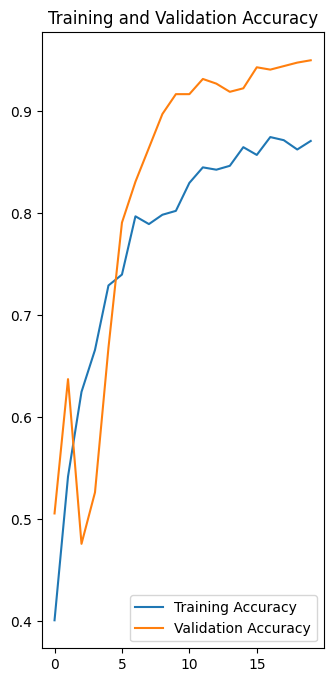

In [15]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

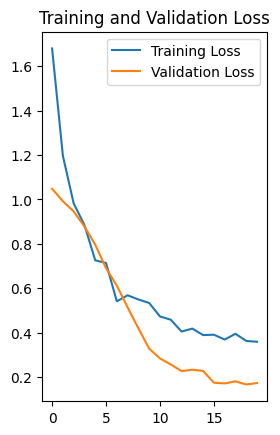

In [16]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
# Mengevaluasi model
final_val_loss, final_val_acc = model.evaluate(validation_generator)
print(f"Final validation accuracy: {final_val_acc:.2f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.9394 - loss: 0.1692
Final validation accuracy: 0.95


In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Fungsi untuk memprediksi gambar dan menampilkan hasil di dalam Jupyter Notebook
def predict_and_show_image(img_path, model, class_names):
    # Load the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(200, 300))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array = img_array / 255.0  # Normalisasi

    # Prediksi dengan model
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])  # Mendapatkan index kelas yang diprediksi
    predicted_class = class_names[predicted_class_index]

    # Memuat gambar dengan OpenCV
    img_cv2 = cv2.imread(img_path)  # Memuat gambar dengan OpenCV
    img_cv2 = cv2.resize(img_cv2, (300, 200))  # Ubah ukuran gambar
    img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)  # Ubah dari BGR (OpenCV) ke RGB (Matplotlib)

    # Menampilkan gambar dan hasil prediksi di Jupyter Notebook menggunakan Matplotlib
    plt.figure(figsize=(6, 4))
    plt.imshow(img_cv2)
    plt.title(f"Prediction: {predicted_class}")
    plt.axis('off')  # Hilangkan axis
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


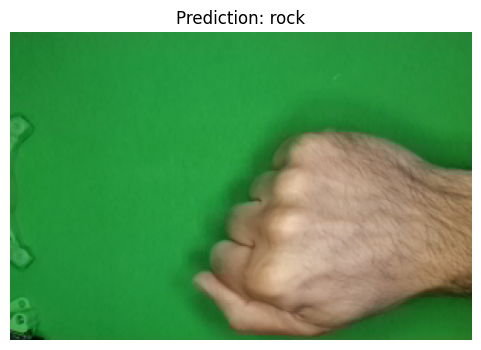

In [30]:
# Contoh penggunaan fungsi prediksi
predict_and_show_image('./predict/rock.png', model, ['paper', 'rock', 'scissors'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


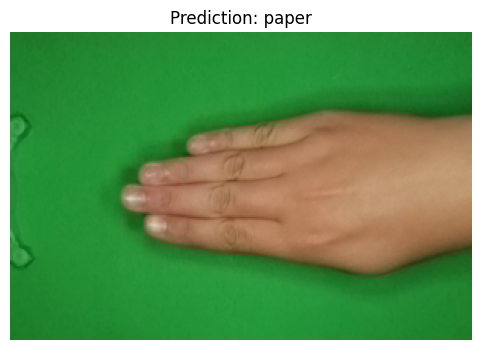

In [31]:
predict_and_show_image('./predict/paper.png', model, ['paper', 'rock', 'scissors'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


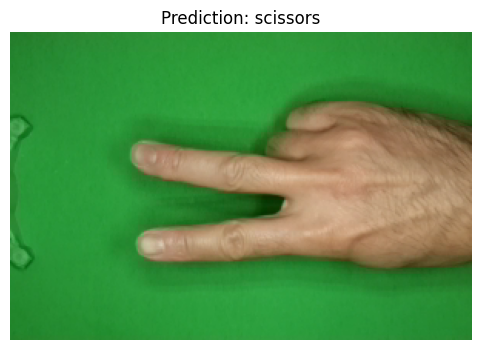

In [29]:
predict_and_show_image('./predict/scissor.png', model, ['paper', 'rock', 'scissors'])